In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# built in python modules
import datetime
import os
import inspect
import sys

# python add-ons
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
import wrf
import wrf.latlonutils as llutils

# Import the pvlib module
if sys.platform == 'linux':
    sys.path.append('/home/jsward/Documents/01_Research/01_Renewable_Analysis/WRF/pvlib-python')
import pvlib
from pvlib.wrfcast import WRF

In [2]:
# Define the path to where you WRF data file is stored 
# (note: don't forget to add the "/" at the end of the directory)
wrfout_dir = '/Users/jsward/Documents/wrf_output/offshore_wind/config_A/2mp1lw4sw4lsm5pbl3cu/'
wrfout_file = 'wrfout_d03_2010-07-01'
wrfout_file_processed = 'offshorewind_' + wrfout_file


met_data = xr.open_dataset(wrfout_dir+wrfout_file_processed)

In [3]:
met_data

<xarray.Dataset>
Dimensions:     (Time: 217, bottom_top: 34, south_north: 183, west_east: 144)
Coordinates:
    XLONG       (south_north, west_east) float32 ...
    XLAT        (south_north, west_east) float32 ...
    XTIME       (Time) float32 ...
  * Time        (Time) datetime64[ns] 2010-07-01 ... 2010-07-10
Dimensions without coordinates: bottom_top, south_north, west_east
Data variables:
    POWER       (Time, south_north, west_east) float32 ...
    height_agl  (Time, bottom_top, south_north, west_east) float32 ...
    wspd        (Time, bottom_top, south_north, west_east) float32 ...
    wdir        (Time, bottom_top, south_north, west_east) float32 ...
Attributes:
    TITLE:                            OUTPUT FROM WRF V4.2.1 MODEL
    START_DATE:                      2010-07-01_00:00:00
    SIMULATION_START_DATE:           2010-07-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        145
    SOUTH-NORTH_GRID_DIMENSION:      184
    BOTTOM-TOP_GRID_DIMENSION:       35
    DX:                              1333.3334
    DY:                              1333.3334
    AERCU_OPT:                       0
    AERCU_FCT:                       1.0
    IDEAL_CASE:                      0
    DIFF_6TH_SLOPEOPT:               0
    AUTO_LEVELS_OPT:                 2
    DIFF_6TH_THRESH:                 0.1
    DZBOT:                           50.0
    DZSTRETCH_S:                     1.3
    DZSTRETCH_U:                     1.1
    SKEBS_ON:                        0
    SPEC_BDY_FINAL_MU:               1
    USE_Q_DIABATIC:                  0
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          4
    DAMP_OPT:                        0
    DAMPCOEF:                        0.2
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      2
    RA_LW_PHYSICS:                   1
    RA_SW_PHYSICS:                   4
    SF_SFCLAY_PHYSICS:               1
    SF_SURFACE_PHYSICS:              4
    BL_PBL_PHYSICS:                  5
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      0
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 2
    USE_THETA_M:                     1
    GWD_OPT:                         0
    SF_URBAN_PHYSICS:                0
    SF_SURFACE_MOSAIC:               0
    SF_OCEAN_PHYSICS:                0
    SHCU_PHYSICS:                    0
    MFSHCONV:                        0
    FEEDBACK:                        1
    SMOOTH_OPTION:                   0
    SWRAD_SCAT:                      1.0
    W_DAMPING:                       0
    DT:                              5.0
    RADT:                            1.0
    BLDT:                            0.0
    CUDT:                            0.0
    AER_OPT:                         0
    SWINT_OPT:                       1
    AER_TYPE:                        1
    AER_AOD550_OPT:                  1
    AER_ANGEXP_OPT:                  1
    AER_SSA_OPT:                     1
    AER_ASY_OPT:                     1
    AER_AOD550_VAL:                  0.12
    AER_ANGEXP_VAL:                  1.3
    AER_SSA_VAL:                     0.85
    AER_ASY_VAL:                     0.9
    MOIST_ADV_OPT:                   1
    SCALAR_ADV_OPT:                  1
    TKE_ADV_OPT:                     1
    DIFF_6TH_OPT:                    0
    DIFF_6TH_FACTOR:                 0.12
    OBS_NUDGE_OPT:                   0
    BUCKET_MM:                       -1.0
    BUCKET_J:                        -1.0
    PREC_ACC_DT:                     0.0
    ISFTCFLX:                        0
    ISHALLOW:                        0
    ISFFLX:                 

In [4]:
met_data.Time

<xarray.DataArray 'Time' (Time: 217)>
array(['2010-07-01T00:00:00.000000000', '2010-07-01T01:00:00.000000000',
       '2010-07-01T02:00:00.000000000', ..., '2010-07-09T22:00:00.000000000',
       '2010-07-09T23:00:00.000000000', '2010-07-10T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    XTIME    (Time) float32 0.0 60.0 120.0 180.0 ... 12840.0 12900.0 12960.0
  * Time     (Time) datetime64[ns] 2010-07-01 2010-07-01T01:00:00 ... 2010-07-10

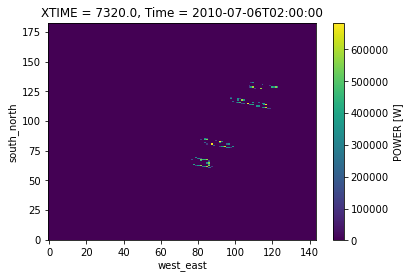

In [5]:
# Do a quick visulazation plot (after selecting by dimension)
met_data.POWER.sel(Time='2010-07-06 02').plot()

In [13]:
# Select by index coordinate
met_data.POWER.isel(south_north=75, west_east=100)

<xarray.DataArray 'POWER' (Time: 217)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
    XLONG    float32 -73.21463
    XLAT     float32 39.64883
    XTIME    (Time) float32 0.0 60.0 120.0 180.0 ... 12840.0 12900.0 12960.0
  * Time     (Time) datetime64[ns] 2010-07-01 2010-07-01T01:00:00 ... 2010-07-10
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  Power production
    units:        W
    stagger:      
    projection:   LambertConformal(stand_lon=-97.0, moad_cen_lat=40.259845733...

In [11]:
met_data.POWER.sum(dim=['south_north', 'west_east']).to_pandas()

Time
2010-07-01 00:00:00            0.0
2010-07-01 01:00:00    156181712.0
2010-07-01 02:00:00    102413832.0
2010-07-01 03:00:00     64662972.0
2010-07-01 04:00:00     56039952.0
                          ...     
2010-07-09 20:00:00     15388366.0
2010-07-09 21:00:00     23865072.0
2010-07-09 22:00:00     26199804.0
2010-07-09 23:00:00     17782204.0
2010-07-10 00:00:00      7905630.0
Length: 217, dtype: float32